In [1]:
import pandas as pd
import re 
import numpy as np
import joblib
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline   
from sklearn.metrics import accuracy_score
import collections

In [2]:
df = pd.read_csv(r'C:\Users\alifs\Documents\hasil_preprocessing_MIX1.csv')
#df = pd.read_csv(r'C:\Users\alifs\Desktop\hasil_preprocessing_MIX198.csv')
#df = pd.read_csv(r'C:\Users\alifs\Documents\hasil_preprocessing_MIX1.8.csv')
df.info

<bound method DataFrame.info of      Unnamed: 0                                   Comments_youtube    Label  \
0             0  semoga aja gajadi sekolah awal tahun karna wak...  negatif   
1             1  tatap muka moga2 tdk terlalu ribet dgn terlalu...  positif   
2             2  sistem buka tutup sekolah akan tiba covid naik...  negatif   
3             3  padahal indonesia tembus 500 000 covid astagfi...  negatif   
4             4  semuanya tergantung orang tua saya kalau misal...  negatif   
..          ...                                                ...      ...   
499         552                                      alhamdulillah  positif   
500         553  mending daring aja pak kalo offline masih berk...  negatif   
501         554  enak online aja lah tinggal ngerjain tugas pst...  negatif   
502         555  biarkan saja anak anak sekolah on line sampai ...  negatif   
503         556                          jujur pak saya betah pjj   negatif   

                   

In [7]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,Comments_youtube,Label,COMMENTS_YOUTUBE,TOKENIZATION,STOP_REMOVAL,STEMMING,Polarity
0,semoga aja gajadi sekolah awal tahun karna wak...,negatif,semoga aja gajadi sekolah awal tahun karna wak...,"['semoga', 'aja', 'gajadi', 'sekolah', 'awal',...",semoga aja gajadi sekolah karna kemarin simula...,moga aja gajadi sekolah karna kemarin simulasi...,0
1,tatap muka moga2 tdk terlalu ribet dgn terlalu...,positif,tatap muka moga2 tdk terlalu ribet dgn terlalu...,"['tatap', 'muka', 'moga2', 'tdk', 'terlalu', '...",tatap muka moga2 tdk ribet dgn bnyk aturan onl...,tatap muka moga2 tdk ribet dgn bnyk atur onlin...,1
2,sistem buka tutup sekolah akan tiba covid naik...,negatif,sistem buka tutup sekolah akan tiba covid naik...,"['sistem', 'buka', 'tutup', 'sekolah', 'akan',...",sistem buka tutup sekolah covid sekolah tutup ...,sistem buka tutup sekolah covid sekolah tutup ...,0
3,padahal indonesia tembus 500 000 covid astagfi...,negatif,padahal indonesia tembus 500 000 covid astagfi...,"['padahal', 'indonesia', 'tembus', '500', '000...",indonesia tembus 500 000 covid astagfirullah,indonesia tembus 500 000 covid astagfirullah,0
4,semuanya tergantung orang tua saya kalau misal...,negatif,semuanya tergantung orang tua saya kalau misal...,"['semuanya', 'tergantung', 'orang', 'tua', 'sa...",tergantung orang tua terkena covid tanggal mat...,gantung orang tua kena covid tanggal mati adek,0
...,...,...,...,...,...,...,...
499,alhamdulillah,positif,alhamdulillah,['alhamdulillah'],alhamdulillah,alhamdulillah,1
500,mending daring aja pak kalo offline masih berk...,negatif,mending daring aja pak kalo offline masih berk...,"['mending', 'daring', 'aja', 'pak', 'kalo', 'o...",mending daring aja kalo offline berkerumun,mending daring aja kalo offline kerumun,0
501,enak online aja lah tinggal ngerjain tugas pst...,negatif,enak online aja lah tinggal ngerjain tugas pst...,"['enak', 'online', 'aja', 'lah', 'tinggal', 'n...",enak online aja tinggal ngerjain tugas psti kls,enak online aja tinggal ngerjain tugas psti kls,0
502,biarkan saja anak anak sekolah on line sampai ...,negatif,biarkan saja anak anak sekolah on line sampai ...,"['biarkan', 'saja', 'anak', 'anak', 'sekolah',...",biarkan anak anak sekolah on line setahun mall...,biar anak anak sekolah on line tahun mall buka...,0


In [8]:
def convert(Polarity):
    if Polarity == 'positif':
        return 1
    else:
        return 0
    

In [9]:
df['Polarity'] = df['Label'].apply(convert)

C:\Users\alifs\AppData\Local\Temp/ipykernel_7240/3917345290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Polarity'] = df['Label'].apply(convert)


In [10]:
df

,Comments_youtube,Label,COMMENTS_YOUTUBE,TOKENIZATION,STOP_REMOVAL,STEMMING,Polarity
0,semoga aja gajadi sekolah awal tahun karna wak...,negatif,semoga aja gajadi sekolah awal tahun karna wak...,"['semoga', 'aja', 'gajadi', 'sekolah', 'awal',...",semoga aja gajadi sekolah karna kemarin simula...,moga aja gajadi sekolah karna kemarin simulasi...,0
1,tatap muka moga2 tdk terlalu ribet dgn terlalu...,positif,tatap muka moga2 tdk terlalu ribet dgn terlalu...,"['tatap', 'muka', 'moga2', 'tdk', 'terlalu', '...",tatap muka moga2 tdk ribet dgn bnyk aturan onl...,tatap muka moga2 tdk ribet dgn bnyk atur onlin...,1
2,sistem buka tutup sekolah akan tiba covid naik...,negatif,sistem buka tutup sekolah akan tiba covid naik...,"['sistem', 'buka', 'tutup', 'sekolah', 'akan',...",sistem buka tutup sekolah covid sekolah tutup ...,sistem buka tutup sekolah covid sekolah tutup ...,0
3,padahal indonesia tembus 500 000 covid astagfi...,negatif,padahal indonesia tembus 500 000 covid astagfi...,"['padahal', 'indonesia', 'tembus', '500', '000...",indonesia tembus 500 000 covid astagfirullah,indonesia tembus 500 000 covid astagfirullah,0
4,semuanya tergantung orang tua saya kalau misal...,negatif,semuanya tergantung orang tua saya kalau misal...,"['semuanya', 'tergantung', 'orang', 'tua', 'sa...",tergantung orang tua terkena covid tanggal mat...,gantung orang tua kena covid tanggal mati adek,0
...,...,...,...,...,...,...,...
499,alhamdulillah,positif,alhamdulillah,['alhamdulillah'],alhamdulillah,alhamdulillah,1
500,mending daring aja pak kalo offline masih berk...,negatif,mending daring aja pak kalo offline masih berk...,"['mending', 'daring', 'aja', 'pak', 'kalo', 'o...",mending daring aja kalo offline berkerumun,mending daring aja kalo offline kerumun,0
501,enak online aja lah tinggal ngerjain tugas pst...,negatif,enak online aja lah tinggal ngerjain tugas pst...,"['enak', 'online', 'aja', 'lah', 'tinggal', 'n...",enak online aja tinggal ngerjain tugas psti kls,enak online aja tinggal ngerjain tugas psti kls,0
502,biarkan saja anak anak sekolah on line sampai ...,negatif,biarkan saja anak anak sekolah on line sampai ...,"['biarkan', 'saja', 'anak', 'anak', 'sekolah',...",biarkan anak anak sekolah on line setahun mall...,biar anak anak sekolah on line tahun mall buka...,0


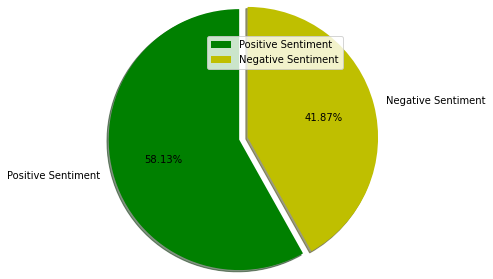

In [53]:
sentiments = ['Positive Sentiment', 'Negative Sentiment'] 
slices = [(df['Polarity'] ==1 ).sum(), (df['Polarity'] !=1).sum()] 
colors = ['g', 'y'] 
plt.pie(slices, labels = sentiments, colors=colors, startangle=90, shadow = True,
        explode = (0, 0.1), radius = 1.5, autopct = '%1.2f%%') 
plt.legend()
plt.show()

Ekstraksi fitur countvectorizer dan tfidf

In [12]:
y = df['Polarity']
vectorizer = CountVectorizer()
print(df['STEMMING'].shape)
x =vectorizer.fit_transform(df['STEMMING'])

print(x.toarray())
print('Shape of Sparse Matrix: ',x.shape)
print('Amount of Non-zero occurrences: ', x.nnz )

filename1 = 'count_vectorized1.pkl'
pickle.dump(vectorizer, open(filename1,'wb'))

tf_transform = TfidfTransformer(use_idf=False).fit(x)
x = tf_transform.transform(x)
print(x.shape)

filename1 = 'tfid_transform1.pkl'
pickle.dump(tf_transform, open(filename1,'wb'))


(504,)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Shape of Sparse Matrix:  (504, 1615)
Amount of Non-zero occurrences:  5050
(504, 1615)


In [13]:
density = (100.0 * x.nnz / (x.shape[0] * x.shape[1]))
print('Density: {}'.format((density)))


Density: 0.6204236080397071


Membagi Data menjadi 2 banding 8

In [14]:
#spilt
X_train,X_test,y_train,y_test= train_test_split(
x,y,test_size=0.2,random_state=20)



In [16]:
#classifier data
nb =MultinomialNB()
nb.fit(X_train,y_train)
preds =nb.predict(X_test)

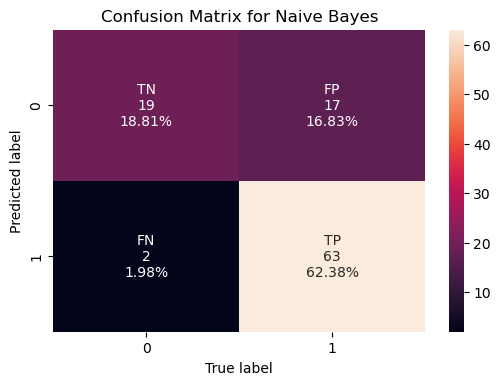

In [17]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=100)
cf = confusion_matrix(y_test, preds)
labels = ['TN','FP','FN','TP']
labels = np.asarray(labels).reshape(2,2)


group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f"{v1}\n{v2}\n{v3}"for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)


sns.heatmap(cf, annot=labels, fmt="")
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

In [13]:
import sklearn.metrics as metrics

# Confusion matrix
[TN=12 FP=29
FN=2 TP=61]

In [18]:
print(classification_report(y_test,preds))
acc = (accuracy_score(y_test,preds))*100
print(round(acc,2),'%')

              precision    recall  f1-score   support

           0       0.90      0.53      0.67        36
           1       0.79      0.97      0.87        65

    accuracy                           0.81       101
   macro avg       0.85      0.75      0.77       101
weighted avg       0.83      0.81      0.80       101

81.19 %


In [15]:
from io import StringIO
classification = classification_report(y_test,preds)
a = StringIO(classification)
with open('classification.csv','w') as f:
    for line in a:
        f.write(line)

In [19]:
accuracy = accuracy_score(y_test,preds)
a = np.asarray([accuracy])
np.savetxt("accuracy.csv", a, delimiter=",",fmt='%s')

In [20]:
print('Dataset size:',df.shape)
print('Column are:',df.columns)

Dataset size: (504, 7)
Column are: Index(['Comments_youtube', 'Label', 'COMMENTS_YOUTUBE', 'TOKENIZATION',
       'STOP_REMOVAL', 'STEMMING', 'Polarity'],
      dtype='object')


In [21]:
final = df[['COMMENTS_YOUTUBE','STEMMING','Label','Polarity']]


In [22]:
final

,COMMENTS_YOUTUBE,STEMMING,Label,Polarity
0,semoga aja gajadi sekolah awal tahun karna wak...,moga aja gajadi sekolah karna kemarin simulasi...,negatif,0
1,tatap muka moga2 tdk terlalu ribet dgn terlalu...,tatap muka moga2 tdk ribet dgn bnyk atur onlin...,positif,1
2,sistem buka tutup sekolah akan tiba covid naik...,sistem buka tutup sekolah covid sekolah tutup ...,negatif,0
3,padahal indonesia tembus 500 000 covid astagfi...,indonesia tembus 500 000 covid astagfirullah,negatif,0
4,semuanya tergantung orang tua saya kalau misal...,gantung orang tua kena covid tanggal mati adek,negatif,0
...,...,...,...,...
499,alhamdulillah,alhamdulillah,positif,1
500,mending daring aja pak kalo offline masih berk...,mending daring aja kalo offline kerumun,negatif,0
501,enak online aja lah tinggal ngerjain tugas pst...,enak online aja tinggal ngerjain tugas psti kls,negatif,0
502,biarkan saja anak anak sekolah on line sampai ...,biar anak anak sekolah on line tahun mall buka...,negatif,0


In [ ]:
Final = final.rename(columns={'COMMENTS_YOUTUBE':'Komentar_Youtube','STOP_REMOVAL':'Stop_Removal','Label':'Label','Polarity':'Polarity'})

In [ ]:
Final

,Komentar_Youtube,STEMMING,Label,Polarity
0,semoga aja gajadi sekolah awal tahun karna wak...,moga aja gajadi sekolah karna kemarin simulasi...,negatif,0
1,tatap muka moga2 tdk terlalu ribet dgn terlalu...,tatap muka moga2 tdk ribet dgn bnyk atur onlin...,positif,1
2,sistem buka tutup sekolah akan tiba covid naik...,sistem buka tutup sekolah covid sekolah tutup ...,negatif,0
3,padahal indonesia tembus 500 000 covid astagfi...,indonesia tembus 500 000 covid astagfirullah,negatif,0
4,semuanya tergantung orang tua saya kalau misal...,gantung orang tua kena covid tanggal mati adek,negatif,0
...,...,...,...,...
499,alhamdulillah,alhamdulillah,positif,1
500,mending daring aja pak kalo offline masih berk...,mending daring aja kalo offline kerumun,negatif,0
501,enak online aja lah tinggal ngerjain tugas pst...,enak online aja tinggal ngerjain tugas psti kls,negatif,0
502,biarkan saja anak anak sekolah on line sampai ...,biar anak anak sekolah on line tahun mall buka...,negatif,0


In [ ]:
Final.to_csv('hasil_analysis.csv')

Train Data to MultinomialNaiveBayes

In [23]:
#Fit the model on training set
model =MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [24]:
#save the model to disk
filename ='model_analisis_TatapMUka.pkl'
pickle.dump(model,open(filename,'wb'))

In [25]:
#load the model from disk
loaded_model = pickle.load(open(filename,'rb'))
result = loaded_model.score(X_test,y_test)
print(result)


0.8118811881188119


Visualization Result with Pie Chart

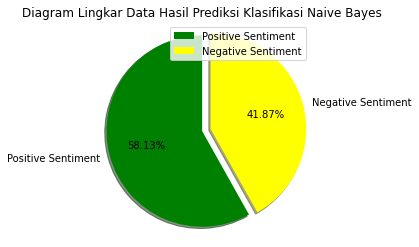

In [52]:
label_positive = 1 
label_negative = 0

# menghitung jumlah label positif dan negatif pada data test setelah hasil prediksi model
sentiment_count_label = collections.Counter(preds)
juml_pos_nb= sentiment_count_label[label_positive]
juml_neg_nb = sentiment_count_label[label_negative]

#pie chart analisis sentimen

labels = ['Positive','Negative']
Category = [juml_pos_nb, juml_neg_nb]
fig, ax = plt.subplots()
colors = ['green', 'yellow']



plt.pie(slices, labels = sentiments, colors=colors, startangle=90, shadow = True,
        explode = (0, 0.1), radius = 1.1, autopct = '%1.2f%%') 



plt.title('Diagram Lingkar Data Hasil Prediksi Klasifikasi Naive Bayes')

plt.legend()

plt.show()


